# Prediction of Career Lengths of NBA Players

The dataset details the performance metrics of NBA players and whether their careers span more than 5 years or not. 

### Aim
The task is to predict whether the careers of these players will span for more than 5 years or less.


### Feature descriptions:
The dataset contains columns giving values for points attained by NBA players in their careers. The description of the features is as given below


|Features|Description|
|----|----|
|Name| Name of the Player|
|Games Played|Number of Games Played by the player|
|Minutes| Minutes Played
|Points| Points Per Game|
|Field Goals Made| Successful field goals made|
|Field Goals Attempted | Field goals attempted |
|Field Goals Percentage | Percentage of successful field goals out of the field goals attempted|
|3 Pointers Made| Successful 3 pointer attempts|
|3 Pointers Attempted | Total 3 pointers attempted|
|3 Pointers Percentage | Percentage of successful 3 pointers out of those attempted|
|Free Throws Made| Successful number of free throws | 
|Free Throws Attempted| Total attempted number of free throws|
|Free Throw Percentage| Successful number of free throws out of those attempted|
|OREB|Offesnisve Rebounds|
|DREB|Defensive Rebounds |
|REB|Rebounds|
|AST|Assists|
|STL|Steals|
|BLK|Number of blocks|
|TOV |Number of Turnovers|
|Play for more than 5 years or less| 1 if career length is greater than 5 years else 0 if career length is less than 5 years|

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)#sets the total number of columns visible in the output. With "None", it is unlimited

In [3]:
print(pd.get_option('display.max_columns'))

None


### Read the data. List the categorical and continuous features in the dataset. Find the number of null values in every feature and impute them appropriately. 

In [4]:
# Read the data
df = pd.read_csv('NBA_players.csv')

In [5]:
df.head()

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [6]:
# Categorical and Continuous features
continuous_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

print('Continuous Features are :', continuous_features)
print()
print('Categorical Features are :',categorical_features)
print()

Continuous Features are : ['Games Played', 'Minutes', 'Points', 'Field Goals Made', 'Field Goals Attempted', 'Field Goals Percentage', '3 Pointers Made', '3 Pointers Attempted', '3 Pointers Percentage', 'Free Throws Made', 'Free Throws Attempted', 'Fre Throw Percentage', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'Play for more than 5 years or less']

Categorical Features are : ['Name']



In [7]:
# Check for null values
print('The null values in every feature are :\n', df.isnull().sum())
print()

The null values in every feature are :
 Name                                   0
Games Played                           0
Minutes                                0
Points                                 0
Field Goals Made                       0
Field Goals Attempted                  0
Field Goals Percentage                 0
3 Pointers Made                        0
3 Pointers Attempted                   0
3 Pointers Percentage                 11
Free Throws Made                       0
Free Throws Attempted                  0
Fre Throw Percentage                   0
OREB                                   0
DREB                                   0
REB                                    0
AST                                    0
STL                                    0
BLK                                    0
TOV                                    0
Play for more than 5 years or less     0
dtype: int64



In [8]:
# The null values in the feature `3 Pointers Percentage` are present since
# they indicate that these players haven't attempted any three pointer throws. So we shall replace them with 0

# Fill the null-values with 0
df['3 Pointers Percentage'].fillna(0,inplace=True)

In [9]:
df.isnull().sum()

Name                                  0
Games Played                          0
Minutes                               0
Points                                0
Field Goals Made                      0
Field Goals Attempted                 0
Field Goals Percentage                0
3 Pointers Made                       0
3 Pointers Attempted                  0
3 Pointers Percentage                 0
Free Throws Made                      0
Free Throws Attempted                 0
Fre Throw Percentage                  0
OREB                                  0
DREB                                  0
REB                                   0
AST                                   0
STL                                   0
BLK                                   0
TOV                                   0
Play for more than 5 years or less    0
dtype: int64

In [10]:
# Drop the feature Name
df.drop(['Name'],1,inplace=True)

In [11]:
df.head()

,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


### Seperate the independent features and target

In [12]:
# Features
X = df.iloc[:,:-1]

# target
y = df.iloc[:,-1] 

### Check for class distribution in the target

In [13]:
y.value_counts()

1.0    831
0.0    509
Name: Play for more than 5 years or less, dtype: int64

In [14]:
print((y.value_counts()/y.value_counts().sum())*100)

1.0    62.014925
0.0    37.985075
Name: Play for more than 5 years or less, dtype: float64


The Class distribution doesn't seem to be imbalanced.

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

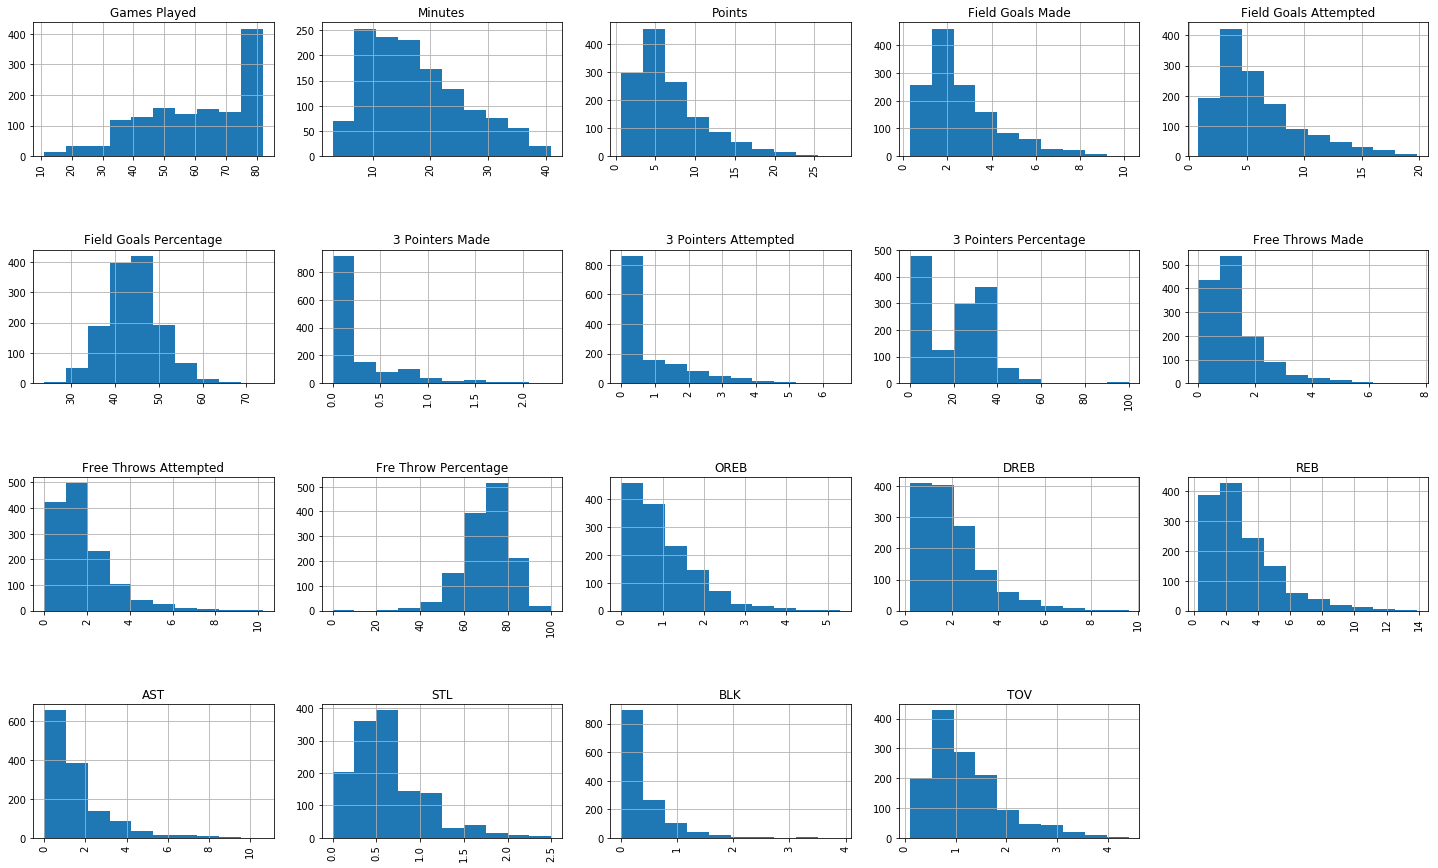

In [15]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)
for i, column in enumerate(X.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if  X.dtypes[column] == np.object:
        X[column].value_counts().plot(kind="bar", axes=ax)
    else:
        X[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

We can infer from the above plots that there exists some amount of skewness in our predictors

### Let's check the amount of skewness in our continuous predictors and depending on the type of skewness, let's apply the necessary transformations for removing the skewness

In [16]:
import scipy.stats as scs

In [17]:
features = []
skewness = []
for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})
print(skewed)

                  Features  Skewness
0             Games Played -0.477208
1                  Minutes  0.631549
2                   Points  1.386670
3         Field Goals Made  1.341041
4    Field Goals Attempted  1.294430
5   Field Goals Percentage  0.208246
6          3 Pointers Made  2.030539
7     3 Pointers Attempted  1.810406
8    3 Pointers Percentage  0.300952
9         Free Throws Made  1.939825
10   Free Throws Attempted  1.842416
11    Fre Throw Percentage -0.767003
12                    OREB  1.437972
13                    DREB  1.487014
14                     REB  1.480077
15                     AST  2.130429
16                     STL  1.363271
17                     BLK  2.801012
18                     TOV  1.339239


In [18]:
# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]

# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<-1)]


print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 

Positively Skewed Features 
                  Features  Skewness
2                  Points  1.386670
3        Field Goals Made  1.341041
4   Field Goals Attempted  1.294430
6         3 Pointers Made  2.030539
7    3 Pointers Attempted  1.810406
9        Free Throws Made  1.939825
10  Free Throws Attempted  1.842416
12                   OREB  1.437972
13                   DREB  1.487014
14                    REB  1.480077
15                    AST  2.130429
16                    STL  1.363271
17                    BLK  2.801012
18                    TOV  1.339239
**************************************************
Negatively Skewed Features 
 Empty DataFrame
Columns: [Features, Skewness]
Index: []


In [19]:
# Let's remove the skewness in the positively skewed variables by using a log transform
for i in positively_skewed_variables['Features']:
    X[i] = np.log1p(X[i])

In [20]:
features = []
skewness = []
for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})
print(skewed)

                  Features  Skewness
0             Games Played -0.477208
1                  Minutes  0.631549
2                   Points  0.211700
3         Field Goals Made  0.389291
4    Field Goals Attempted  0.270901
5   Field Goals Percentage  0.208246
6          3 Pointers Made  1.444205
7     3 Pointers Attempted  0.959972
8    3 Pointers Percentage  0.300952
9         Free Throws Made  0.710020
10   Free Throws Attempted  0.544118
11    Fre Throw Percentage -0.767003
12                    OREB  0.569975
13                    DREB  0.394419
14                     REB  0.319194
15                     AST  0.761574
16                     STL  0.698704
17                     BLK  1.509692
18                     TOV  0.560987


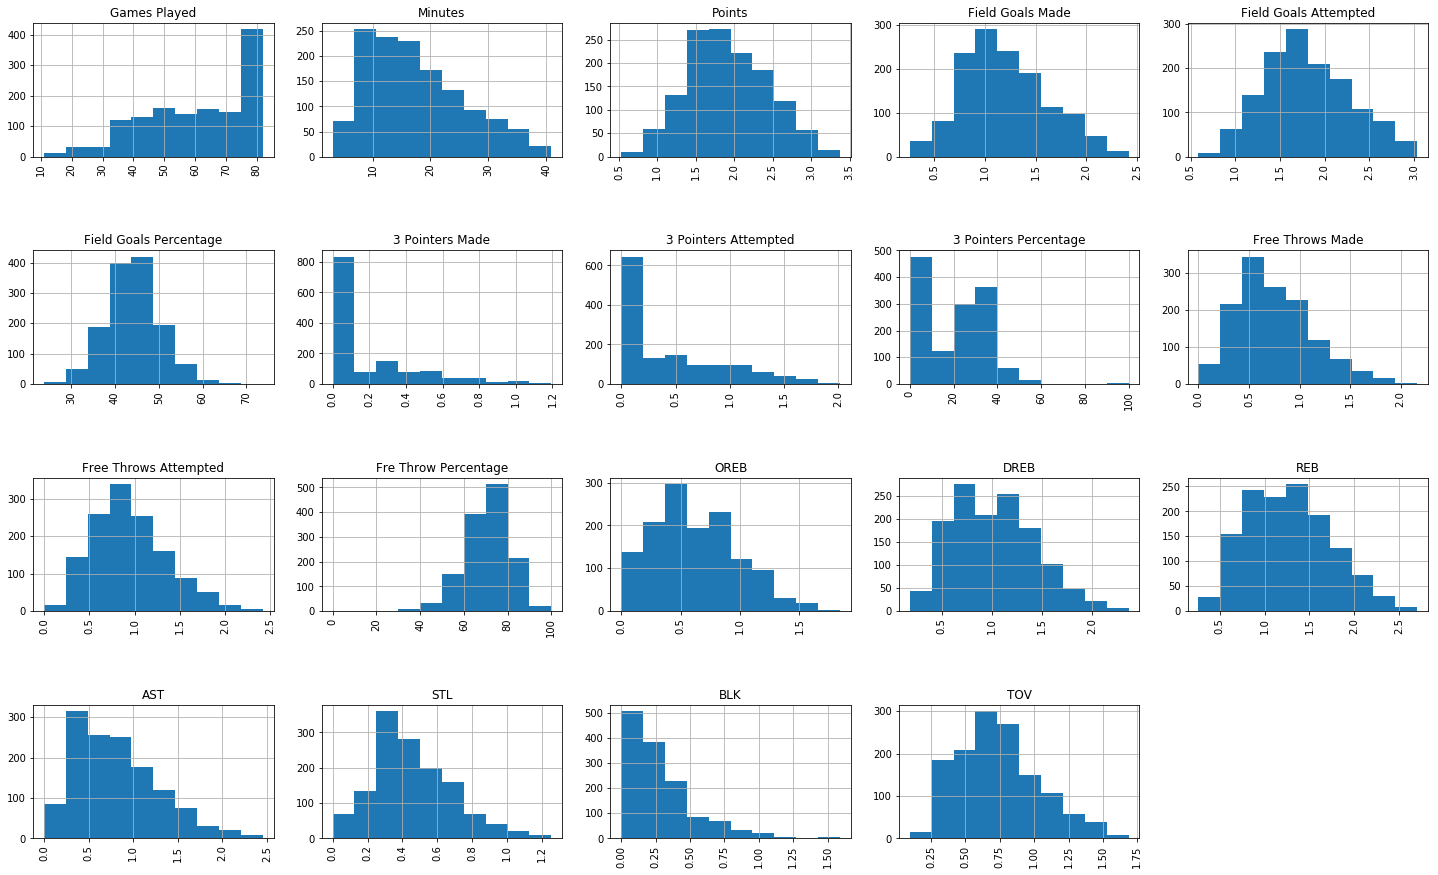

In [21]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)
for i, column in enumerate(X.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if  X.dtypes[column] == np.object:
        X[column].value_counts().plot(kind="bar", axes=ax)
    else:
        X[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Split train and test data into X_train ,y_train,X_test and y_test data and apply a vanilla logistic regression model

In [22]:
# Split into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [23]:
# Apply a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('The AUC_ROC_score for a logistic regression model is :' ,roc_auc_score(y_test,y_pred))
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

The AUC_ROC_score for a logistic regression model is : 0.692542213884
The accuracy for logistic regression is :  0.731343283582


### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy as well as the `roc_auc_score`.

- Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric i.e `roc_auc_score` on the test data. Use parameter `random_state = 42` for results reproducibility.

In [24]:
dt = DecisionTreeClassifier(random_state =42,max_depth=3)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred_dt = dt.predict(X_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred_dt)
print('AUC_ROC_score is ',roc_score)
print('Accuracy score is ',accuracy_score(y_test,y_pred_dt))
print()
print(classification_report(y_test,y_pred_dt))

AUC_ROC_score is  0.587398373984
Accuracy score is  0.644278606965

             precision    recall  f1-score   support

        0.0       0.57      0.33      0.42       156
        1.0       0.67      0.84      0.74       246

avg / total       0.63      0.64      0.62       402



We can see that Decision Tree is giving us an accuracy of 64% while the `AUC_ROC_score` is around 59%. 

###  Now let's apply a Random Forest model
- Let the parameters for the model be `criterion='gini'`, `max_depth= 6`,`max_features= 'auto'`,`n_estimators= 11`

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='gini', max_depth= 6, max_features= 'auto', n_estimators= 11, random_state=2)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.64602876798
Accuracy is  0.681592039801
             precision    recall  f1-score   support

        0.0       0.61      0.49      0.54       156
        1.0       0.71      0.80      0.76       246

avg / total       0.67      0.68      0.67       402



### Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [26]:
rfc = RandomForestClassifier(random_state=2)
param_grid = { 
'n_estimators': [11,12,13],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
}
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)

grid_search_model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 12}

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='entropy', max_depth= 6,max_features= 'auto',n_estimators= 12, random_state=2)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.642823639775
Accuracy is  0.679104477612
             precision    recall  f1-score   support

        0.0       0.61      0.48      0.54       156
        1.0       0.71      0.80      0.75       246

avg / total       0.67      0.68      0.67       402



### Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

In [28]:
## Hard Voting
# Import libraries
from sklearn.ensemble import VotingClassifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list,voting='hard')

# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('DT', Decisio...estimators=10, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [29]:
voting_clf_hard.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=4,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_st

In [30]:
voting_clf_hard.classes_

array([ 0.,  1.])

In [31]:
# predict on test
y_pred_vot = voting_clf_hard.predict(X_test)

# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)

print("roc_auc_score:", roc_auc_score(y_test,y_pred_vot))
print("accuracy score:", accuracy_score(y_test,y_pred_vot))
print("classification_report:\n",classification_report(y_test,y_pred_vot))

roc_auc_score: 0.666432145091
accuracy score: 0.696517412935
classification_report:
              precision    recall  f1-score   support

        0.0       0.63      0.53      0.58       156
        1.0       0.73      0.80      0.76       246

avg / total       0.69      0.70      0.69       402



In [32]:
## Soft Voting
# Initialize voting classifier
voting_clf_soft = VotingClassifier(estimators=model_list,voting='soft')

# Fit the model on training data
voting_clf_soft.fit(X_train,y_train)

# predict on test
y_pred_vot = voting_clf_soft.predict(X_test)

# accuracy
soft_voting_score = voting_clf_soft.score(X_test,y_test)

print("roc_auc_score:", roc_auc_score(y_test,y_pred_vot))
print("accuracy score:", accuracy_score(y_test,y_pred_vot))
print("classification_report:\n",classification_report(y_test,y_pred_vot))


roc_auc_score: 0.626016260163
accuracy score: 0.654228855721
classification_report:
              precision    recall  f1-score   support

        0.0       0.56      0.50      0.53       156
        1.0       0.70      0.75      0.73       246

avg / total       0.65      0.65      0.65       402



### Let's check how a bagging classifier using a Decision Tree performs on our data

In [33]:
# Import Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100)

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred_bagging = bagging_clf.predict(X_test)

# accuracy 
print('Accuracy is ',bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred_bagging)

print('AUC_ROC_score is ',score_bagging)
print(classification_report(y_test,y_pred_bagging))

Accuracy is  0.728855721393
AUC_ROC_score is  0.690509693558
             precision    recall  f1-score   support

        0.0       0.70      0.52      0.60       156
        1.0       0.74      0.86      0.80       246

avg / total       0.73      0.73      0.72       402



In [34]:
#Pasting

# Initialize Pasting Classifier
pasting_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100, bootstrap=False)

# Fit the model on training data
pasting_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred_pasting = pasting_clf.predict(X_test)

# accuracy 
print('Accuracy is ',pasting_clf.score(X_test,y_test))

# roc_score
score_pasting = roc_auc_score(y_test,y_pred_pasting)

print('AUC_ROC_score is ',score_pasting)
print(classification_report(y_test,y_pred_pasting))

Accuracy is  0.703980099502
AUC_ROC_score is  0.661976235147
             precision    recall  f1-score   support

        0.0       0.67      0.47      0.55       156
        1.0       0.72      0.85      0.78       246

avg / total       0.70      0.70      0.69       402



### Let's now visualize the AUC_ROC scores for all the models in one plot

In [39]:
rfc.predict_proba(X_test)

array([[ 0.67215332,  0.32784668],
       [ 0.72900958,  0.27099042],
       [ 0.09453472,  0.90546528],
       [ 0.83649194,  0.16350806],
       [ 0.65898363,  0.34101637],
       [ 0.17942882,  0.82057118],
       [ 0.23559556,  0.76440444],
       [ 0.65102478,  0.34897522],
       [ 0.77516501,  0.22483499],
       [ 0.2776823 ,  0.7223177 ],
       [ 0.24996247,  0.75003753],
       [ 0.45676401,  0.54323599],
       [ 0.16490733,  0.83509267],
       [ 0.57215599,  0.42784401],
       [ 0.10689185,  0.89310815],
       [ 0.57459376,  0.42540624],
       [ 0.12922202,  0.87077798],
       [ 0.42828565,  0.57171435],
       [ 0.08109363,  0.91890637],
       [ 0.40608736,  0.59391264],
       [ 0.18759852,  0.81240148],
       [ 0.52031149,  0.47968851],
       [ 0.37196755,  0.62803245],
       [ 0.26683443,  0.73316557],
       [ 0.64736015,  0.35263985],
       [ 0.68675334,  0.31324666],
       [ 0.86585474,  0.13414526],
       [ 0.23305556,  0.76694444],
       [ 0.58226986,

In [35]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [dt,rfc,bagging_clf,voting_clf_soft]#,sclf]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    #predicted probabilities for each class for each sample. Output is an array of [n_samples, n_classes]
    yproba = model.predict_proba(X_test)[::,1] # to select probability estimates of the positive class
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [36]:
result_table

,classifiers,fpr,tpr,auc
0,DecisionTreeClassifier,"[0.0, 0.102564102564, 0.179487179487, 0.211538...","[0.0, 0.341463414634, 0.471544715447, 0.512195...",0.671188
1,RandomForestClassifier,"[0.0, 0.0, 0.00641025641026, 0.00641025641026,...","[0.00406504065041, 0.0162601626016, 0.01626016...",0.745583
2,BaggingClassifier,"[0.0, 0.00641025641026, 0.00641025641026, 0.00...","[0.00406504065041, 0.00406504065041, 0.0243902...",0.758821
3,VotingClassifier,"[0.0, 0.0, 0.00641025641026, 0.00641025641026,...","[0.00406504065041, 0.0243902439024, 0.02439024...",0.717219


In [37]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
DecisionTreeClassifier,"[0.0, 0.102564102564, 0.179487179487, 0.211538...","[0.0, 0.341463414634, 0.471544715447, 0.512195...",0.671188
RandomForestClassifier,"[0.0, 0.0, 0.00641025641026, 0.00641025641026,...","[0.00406504065041, 0.0162601626016, 0.01626016...",0.745583
BaggingClassifier,"[0.0, 0.00641025641026, 0.00641025641026, 0.00...","[0.00406504065041, 0.00406504065041, 0.0243902...",0.758821
VotingClassifier,"[0.0, 0.0, 0.00641025641026, 0.00641025641026,...","[0.00406504065041, 0.0243902439024, 0.02439024...",0.717219


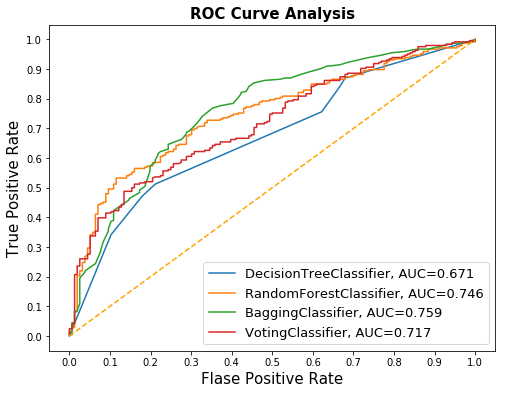

In [38]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a  decision tree model as a meta classifier.

In [25]:
from mlxtend.classifier import StackingClassifier

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
classifier1 = LogisticRegression(C=0.1)
classifier2= DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=4)

classifier_list=[classifier1,classifier2]

# meta-classifier
m_classifier=DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=6)


sclf = StackingClassifier(classifiers=classifier_list, meta_classifier=m_classifier)

sclf.fit(X_train,y_train)

In [ ]:
y_pred_sclf = sclf.predict(X_test)
# s_score=sclf.score(X_train,y_train)
# print("Training score: %.2f " % s_score)

s_score=sclf.score(X_test,y_test)
print("Test score: %.2f " % s_score)
print('AUC_ROC_score is ',roc_auc_score(y_test,y_pred))